In [1]:
# Import necessary libraries
import yfinance
import math                 # For mathematical operations
import numpy as np          # For numerical operations
import pandas as pd         # For data manipulation and analysis
import seaborn as sns       # For data visualization
sns.set_style('whitegrid')  # Set seaborn style to whitegrid
import matplotlib.pyplot as plt  # For plotting graphs
plt.style.use("fivethirtyeight")  # Use 'fivethirtyeight' style for matplotlib plots

# Importing Keras libraries for building neural network models
import keras
from keras.models import Sequential  # For sequential model building
from keras.callbacks import EarlyStopping  # For early stopping during model training
from keras.layers import Dense, LSTM, Dropout  # For adding layers to neural network model

# Importing Scikit-learn libraries for data preprocessing and model evaluation
from sklearn.preprocessing import MinMaxScaler  # For data normalization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For model evaluation

import warnings   # For handling warnings
warnings.simplefilter('ignore')   # Ignore warnings for cleaner output

In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Bitcoin
ticker_symbol = "BTC-USD"

# Fetch data
btc_data = yf.download(ticker_symbol, period="max", interval="1d")

# Display the first few rows of the dataframe
btc_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


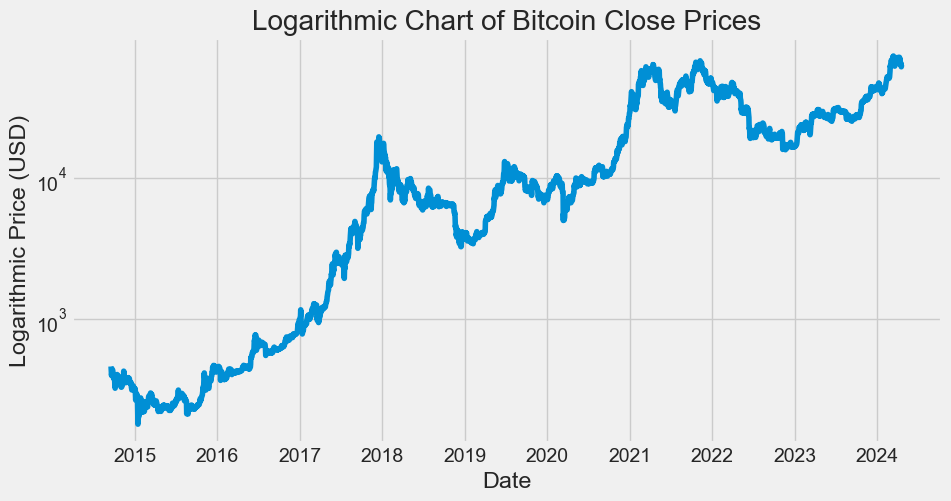

In [3]:
# Logarithmic chart based on opening price
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(btc_data['Close'])
plt.yscale('log')  # Set the scale of the y-axis to logarithmic
plt.title('Logarithmic Chart of Bitcoin Close Prices')
plt.xlabel('Date')
plt.ylabel('Logarithmic Price (USD)')
plt.grid(True)
plt.show()

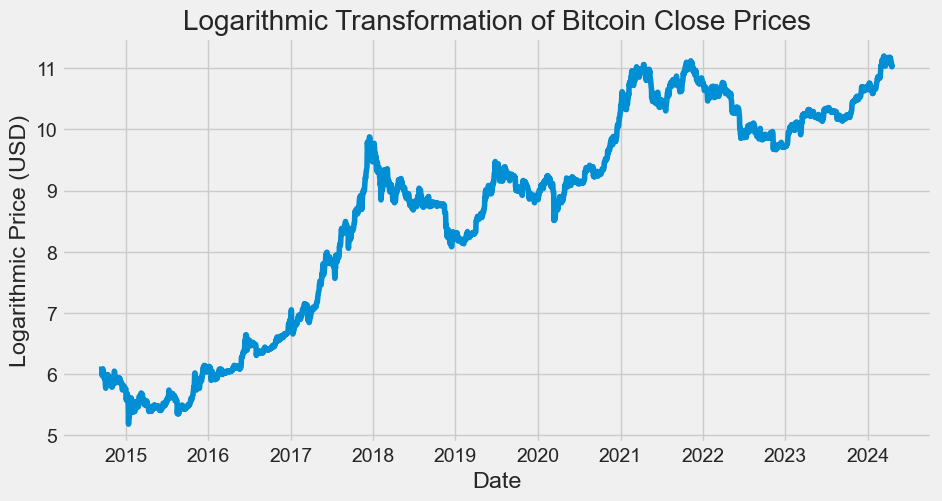

In [4]:
# Adding a new column for the logarithmic transformation of the 'Close' prices
btc_data['Log_Close'] = np.log(btc_data['Close'])


# visualize it
plt.figure(figsize=(10, 5))
plt.plot(btc_data.index, btc_data['Log_Close'])
plt.title('Logarithmic Transformation of Bitcoin Close Prices')
plt.xlabel('Date')
plt.ylabel('Logarithmic Price (USD)')
plt.grid(True)
plt.show()


In [5]:
# Display the updated DataFrame with the new column
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Close
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,6.125414
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,6.050771
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,5.978369
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,6.013480
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,5.988513


# Data Preprocess

In [55]:
# Split data into training and testing based on the date
train_data = btc_data['2014-01-01':'2022-12-31']
test_data = btc_data['2023-01-01':]

In [10]:
train_data.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Close
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,6.125414
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,6.050771
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,5.978369
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,6.013480
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,5.988513


In [70]:
train_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Log_Close
Date,,,,,,,
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239,9.724192
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920,9.714297
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479,9.719705
2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910,9.717314
2022-12-31,16603.673828,16628.986328,16517.519531,16547.496094,16547.496094,11239186456,9.713990


In [71]:
test_data.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Close
Date,,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,9.718668
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,9.722473
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,9.721957
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,9.732891
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,9.731318


In [12]:
train_data.shape

(3028, 7)

In [13]:
test_data.shape

(475, 7)

In [56]:
# SCALE FEATURE

from sklearn.preprocessing import MinMaxScaler

# Define features to include
features = ['Log_Close', 'Volume']

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on training data and transform both train and test data
train_scaled = scaler.fit_transform(train_data[features])
test_scaled = scaler.transform(test_data[features])

In [75]:
train_scaled

array([[1.58802785e-01, 4.31449241e-05],
       [1.46233412e-01, 8.14009147e-05],
       [1.34041549e-01, 9.11925723e-05],
       ...,
       [7.64054132e-01, 4.12190545e-02],
       [7.63651388e-01, 4.53702883e-02],
       [7.63091708e-01, 3.20070863e-02]])

In [76]:
test_scaled

array([[0.76387938, 0.02632321],
       [0.76452023, 0.03445347],
       [0.7644333 , 0.03959735],
       [0.76627453, 0.05247243],
       [0.76600968, 0.03899808],
       [0.76715825, 0.04105216],
       [0.76718913, 0.02196492],
       [0.76853511, 0.02781758],
       [0.76957048, 0.05305082],
       [0.77199839, 0.04502602],
       [0.77664958, 0.0523315 ],
       [0.78520445, 0.09962737],
       [0.79423857, 0.08325435],
       [0.80302738, 0.11101449],
       [0.80225898, 0.05497031],
       [0.8045723 , 0.0763233 ],
       [0.80450775, 0.07121588],
       [0.80070329, 0.08547851],
       [0.80391207, 0.06025419],
       [0.81615159, 0.0820409 ],
       [0.81690047, 0.09242129],
       [0.816477  , 0.0704933 ],
       [0.81805575, 0.07554318],
       [0.81585367, 0.07521941],
       [0.81939718, 0.0874153 ],
       [0.8187763 , 0.07508483],
       [0.81911191, 0.07230817],
       [0.81876396, 0.04190486],
       [0.82411401, 0.07812176],
       [0.81736199, 0.07750035],
       [0.

In [63]:
# Make into Sequences

def create_multivariate_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i, 0])  # Assuming Log_Close is the first feature
    return np.array(X), np.array(y)

# Create sequences for both training and testing datasets
n_steps = 21
X_train, y_train = create_multivariate_sequences(train_scaled, n_steps)
X_test, y_test = create_multivariate_sequences(test_scaled, n_steps)


In [64]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)



X_train: (3007, 21, 2)
y_train: (3007,)
X_test: (454, 21, 2)
y_test: (454,)


In [77]:
X_train

array([[[1.58802785e-01, 4.31449241e-05],
        [1.46233412e-01, 8.14009147e-05],
        [1.34041549e-01, 9.11925723e-05],
        ...,
        [9.89392035e-02, 2.20518233e-04],
        [1.03893062e-01, 2.08276749e-04],
        [1.06980628e-01, 1.23333371e-04]],

       [[1.46233412e-01, 8.14009147e-05],
        [1.34041549e-01, 9.11925723e-05],
        [1.39954014e-01, 8.81834148e-05],
        ...,
        [1.03893062e-01, 2.08276749e-04],
        [1.06980628e-01, 1.23333371e-04],
        [1.15169632e-01, 1.39108297e-04]],

       [[1.34041549e-01, 9.11925723e-05],
        [1.39954014e-01, 8.81834148e-05],
        [1.35749651e-01, 5.88825241e-05],
        ...,
        [1.06980628e-01, 1.23333371e-04],
        [1.15169632e-01, 1.39108297e-04],
        [1.20839490e-01, 2.21467076e-04]],

       ...,

       [[7.69931621e-01, 5.83843482e-02],
        [7.68948484e-01, 5.79051585e-02],
        [7.68904961e-01, 3.61887225e-02],
        ...,
        [7.66838442e-01, 3.38527884e-02],
     

In [78]:
y_train

array([0.11516963, 0.12083949, 0.11923387, ..., 0.76405413, 0.76365139,
       0.76309171])

array([0.816477  , 0.81805575, 0.81585367, 0.81939718, 0.8187763 ,
       0.81911191, 0.81876396, 0.82411401, 0.81736199, 0.81955316,
       0.82375384, 0.82195629, 0.82179444, 0.82094872, 0.81821159,
       0.81677093, 0.82046044, 0.81809222, 0.80966031, 0.80835985,
       0.81005989, 0.80942216, 0.80957588, 0.81273281, 0.8278494 ,
       0.82304043, 0.82962563, 0.83014357, 0.82798651, 0.83142257,
       0.82873732, 0.82702301, 0.82533439, 0.81998085, 0.81981561,
       0.82259603, 0.82232178, 0.81961189, 0.82320484, 0.82198208,
       0.81380454, 0.81373427, 0.81435209, 0.81430889, 0.81272497,
       0.80887934, 0.79803074, 0.79657083, 0.80024385, 0.8123014 ,
       0.8270835 , 0.83085821, 0.82832063, 0.83293252, 0.84816038,
       0.84532403, 0.85189345, 0.85025531, 0.85271507, 0.84744355,
       0.85365764, 0.84858571, 0.84859442, 0.85162691, 0.84640717,
       0.84720099, 0.85374361, 0.85186273, 0.85451431, 0.85411501,
       0.85285541, 0.85039464, 0.85266888, 0.85272802, 0.85192

# Model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Define the model architecture
model = Sequential([
    GRU(50, activation='relu', return_sequences=True, input_shape=(n_steps, len(features))),
    GRU(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 21, 50)            8100      
                                                                 
 gru_11 (GRU)                (None, 50)                15300     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23,451
Trainable params: 23,451
Non-trainable params: 0
_________________________________________________________________


In [66]:

# Assuming X_train and y_train are already prepared with n_steps = 5
model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
94/94 [==============================] - 12s 105ms/step - loss: 0.0352
Epoch 2/10
94/94 [==============================] - 10s 103ms/step - loss: 1.2358e-04
Epoch 3/10
94/94 [==============================] - 10s 106ms/step - loss: 9.6422e-05
Epoch 4/10
94/94 [==============================] - 10s 103ms/step - loss: 8.4403e-05
Epoch 5/10
94/94 [==============================] - 10s 102ms/step - loss: 8.3290e-05
Epoch 6/10
94/94 [==============================] - 10s 103ms/step - loss: 7.4185e-05
Epoch 7/10
94/94 [==============================] - 10s 103ms/step - loss: 7.1527e-05
Epoch 8/10
94/94 [==============================] - 10s 104ms/step - loss: 7.2713e-05
Epoch 9/10
94/94 [==============================] - 10s 107ms/step - loss: 6.8446e-05
Epoch 10/10
94/94 [==============================] - 10s 107ms/step - loss: 6.4506e-05


In [67]:
model.save('btcpred.h5')

# Evaluate

In [68]:
# Make predictions
predictions = model.predict(X_test)

# Assuming y_test is prepared similarly and correctly aligned
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, predictions))
print("RMSE on test data:", rmse)


15/15 [==============================] - 1s 16ms/step
RMSE on test data: 0.005459059751481055


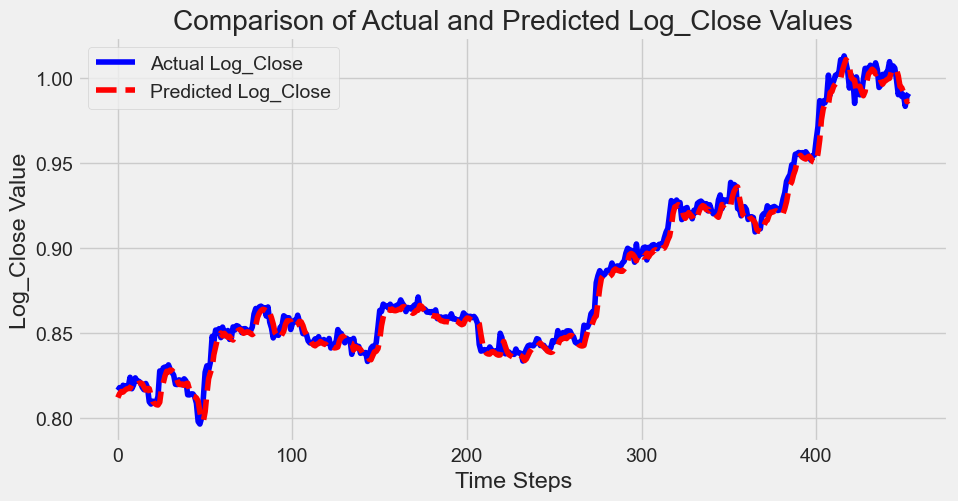

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Log_Close', color='blue')
plt.plot(predictions, label='Predicted Log_Close', color='red', linestyle='--')
plt.title('Comparison of Actual and Predicted Log_Close Values')
plt.xlabel('Time Steps')
plt.ylabel('Log_Close Value')
plt.legend()
plt.show()


The result shows very accurate from the tested data against the predicted data. the data only trained up to 2022, but the prediction able to predict accurately for period 2023 to 2024. it also becasu the price predict only the next day htats why it shows very great result

In [94]:
print(len(predictions))
print(len(y_test))

454
454


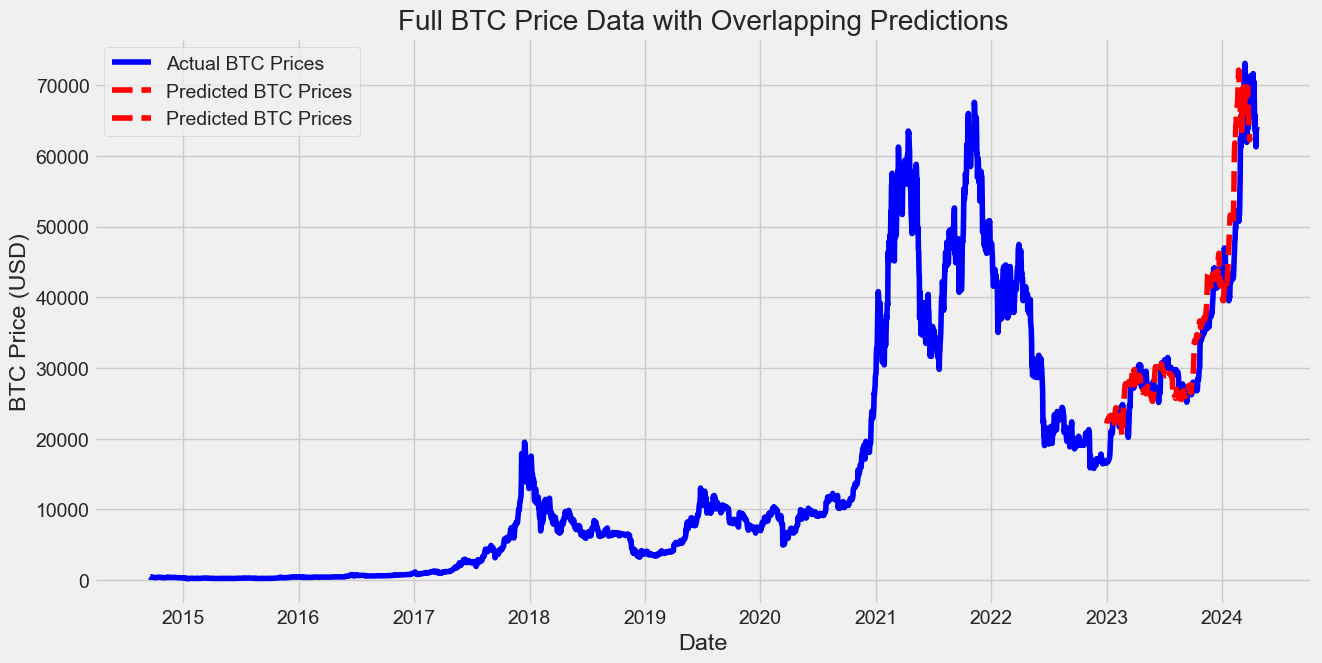

In [98]:
import numpy as np

import numpy as np

# Create a dummy volume array for the test data, matching its size
dummy_volume_feature = np.zeros((test_scaled.shape[0], 1))
dummy_volume_feature2 = np.zeros((predictions.shape[0], 1))

# Stack the predicted log prices with this dummy feature
predictions_with_dummy = np.hstack((predictions, dummy_volume_feature2))

# Combine Log_Close and dummy volume for the inverse transformation
test_with_dummy = np.hstack((test_scaled[:, 0].reshape(-1, 1), dummy_volume_feature))

# Inverse transform to get actual logarithmic prices from scaled values
actual_log_prices = scaler.inverse_transform(test_with_dummy)[:, 0]
# Exponentiate the logarithmic prices to get actual prices
actual_prices = np.exp(actual_log_prices)


# Assuming predictions are already scaled and only for Log_Close
predicted_log_prices = scaler.inverse_transform(predictions_with_dummy)  # predictions should be reshaped if necessary
predicted_prices = np.exp(predicted_log_prices)


import matplotlib.pyplot as plt

# Prepare the index for the plots
dates = btc_data.index  # Ensure btc_data has a DateTimeIndex
test_start_index = dates.get_loc(test_data.index[0])  # Find the starting point of the test data

plt.figure(figsize=(14, 7))
plt.plot(dates, btc_data['Close'], label='Actual BTC Prices', color='blue')  # Full actual data
plt.plot(dates[test_start_index:test_start_index + len(predicted_prices)], predicted_prices, label='Predicted BTC Prices', color='red', linestyle='--')
plt.title('Full BTC Price Data with Overlapping Predictions')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.show()


the result shows pretty good prediction but a bit shifted becaue of the scaling

## Forecast 30 days

In [99]:
# Assuming 'scaled_data' includes all the scaled data up to the last available date
# and 'n_steps' is the number of timesteps your model uses for input
last_sequence = test_scaled[-n_steps:]

# Reshape it to match the model's expected input shape
last_sequence = last_sequence.reshape(1, n_steps, last_sequence.shape[1])

In [100]:
# Initialize an array to store the forecasts
forecasts = []

for _ in range(30):  # Forecast for the next 30 days
    # Predict the next day using the last available sequence
    next_day_log_price = model.predict(last_sequence)
    
    # Append the prediction to the forecasts
    forecasts.append(next_day_log_price[0, 0])
    
    # Update the last sequence with the predicted value
    # Remove the oldest day from the sequence and add the predicted day at the end
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, :] = next_day_log_price  # Assuming next_day_log_price is already in the correct scale
    
    # NOTE: If you are predicting Log_Close, make sure to also update or manage the other features (e.g., Volume)
    # You might need to carry over or estimate other features depending on the model requirements


1/1 [==============================] - 0s 41ms/step


In [101]:
# Convert list of forecasts to an array
forecasts = np.array(forecasts).reshape(-1, 1)

# Mock up the necessary number of dummy features if your model was trained on multiple features
# Here we assume there was one additional feature, e.g., Volume
dummy_features = np.zeros_like(forecasts)

# Combine the forecasts with dummy features for inverse transformation
forecast_with_dummy = np.hstack((forecasts, dummy_features))

# Inverse transform to get actual log prices
forecast_log_prices = scaler.inverse_transform(forecast_with_dummy)[:, 0]

# Convert log prices to actual prices
forecast_prices = np.exp(forecast_log_prices)


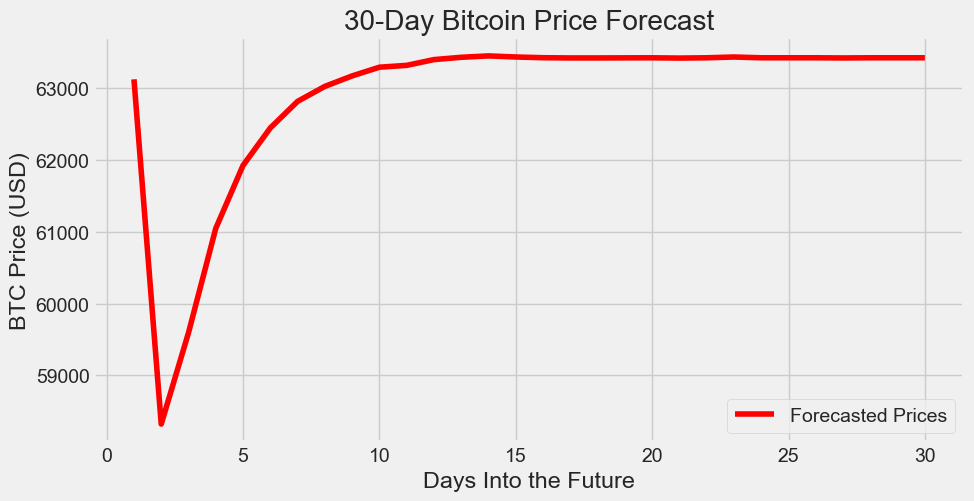

In [102]:
import matplotlib.pyplot as plt

# Plotting the forecasted prices
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), forecast_prices, label='Forecasted Prices', color='red')
plt.title('30-Day Bitcoin Price Forecast')
plt.xlabel('Days Into the Future')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.show()


# without Volume only prices

In [106]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert 'Close' prices to 'Log_Close'
btc_data['Log_Close'] = np.log(btc_data['Close'])

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
btc_data['Scaled_Log_Close'] = scaler.fit_transform(btc_data[['Log_Close']])

# Split data into training and testing sets based on the date
train_data = btc_data[btc_data.index <= '2022-12-31']
test_data = btc_data[btc_data.index >= '2023-01-01']


In [107]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

n_steps = 21
X_train, y_train = create_sequences(train_data['Scaled_Log_Close'].values, n_steps)
X_test, y_test = create_sequences(test_data['Scaled_Log_Close'].values, n_steps)


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU

# Build the model
model = Sequential([
    GRU(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 50)                7950      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


In [109]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
85/85 [==============================] - 6s 52ms/step - loss: 0.0729 - val_loss: 0.0010
Epoch 2/20
85/85 [==============================] - 4s 49ms/step - loss: 5.4505e-04 - val_loss: 6.9080e-05
Epoch 3/20
85/85 [==============================] - 4s 48ms/step - loss: 9.6129e-05 - val_loss: 6.7929e-05
Epoch 4/20
85/85 [==============================] - 4s 48ms/step - loss: 9.2180e-05 - val_loss: 6.9101e-05
Epoch 5/20
85/85 [==============================] - 4s 48ms/step - loss: 8.7827e-05 - val_loss: 7.1725e-05
Epoch 6/20
85/85 [==============================] - 4s 48ms/step - loss: 8.3457e-05 - val_loss: 5.6113e-05
Epoch 7/20
85/85 [==============================] - 4s 48ms/step - loss: 7.9192e-05 - val_loss: 5.2381e-05
Epoch 8/20
85/85 [==============================] - 4s 49ms/step - loss: 7.9795e-05 - val_loss: 5.6353e-05
Epoch 9/20
85/85 [==============================] - 4s 49ms/step - loss: 7.6726e-05 - val_loss: 5.1089e-05
Epoch 10/20
85/85 [==========================

In [110]:
# Predict on test data
predictions = model.predict(X_test)
# Inverse scale predictions and actuals
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print("RMSE on test data:", rmse)


15/15 [==============================] - 0s 9ms/step
RMSE on test data: 0.03680898134289508


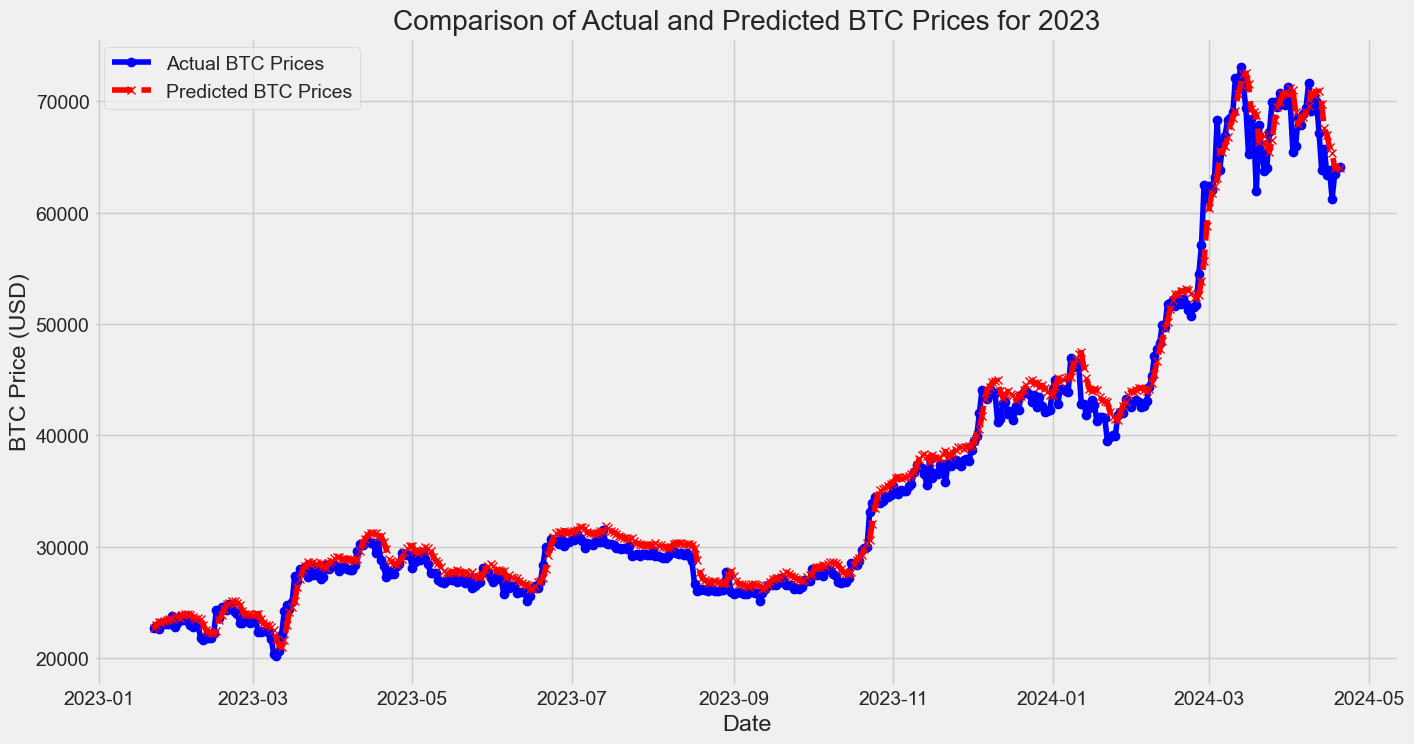

In [111]:
# visualziation
# Assuming 'predictions' contains your model's output and 'y_test' contains the corresponding actual values
# Inverse scale the predictions and the actual values
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Exponentiate the log prices to convert them back to actual prices
predicted_prices = np.exp(predictions_inverse)
actual_prices = np.exp(y_test_inverse)

# Generate a date index for the test period; this assumes you have a continuous daily frequency
test_dates = test_data.index[n_steps:]  # Adjust 'n_steps' if your sequences consume initial dates

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(test_dates, actual_prices, label='Actual BTC Prices', color='blue', marker='o')
plt.plot(test_dates, predicted_prices, label='Predicted BTC Prices', color='red', linestyle='--', marker='x')
plt.title('Comparison of Actual and Predicted BTC Prices for 2023')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


# forecast 30 days

In [113]:
last_sequence = test_data['Scaled_Log_Close'].values[-n_steps:].reshape(1, n_steps, 1)

forecasts = []
for _ in range(30):
    next_day_scaled = model.predict(last_sequence)
    forecasts.append(next_day_scaled[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_scaled

forecasts = np.array(forecasts).reshape(-1, 1)
forecasts = scaler.inverse_transform(forecasts)
forecast_prices = np.exp(forecasts)


1/1 [==============================] - 0s 28ms/step


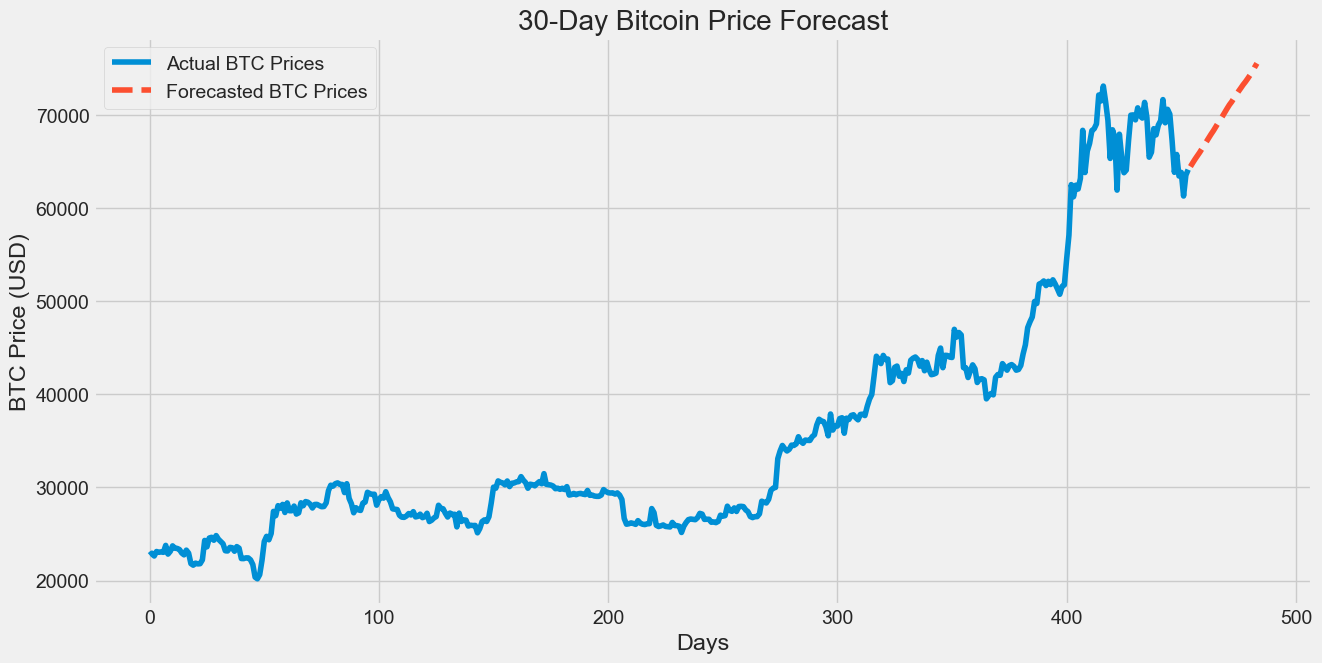

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(np.exp(y_test_inverse), label='Actual BTC Prices')
plt.plot(np.arange(len(y_test), len(y_test) + 30), forecast_prices, label='Forecasted BTC Prices', linestyle='--')
plt.title('30-Day Bitcoin Price Forecast')
plt.xlabel('Days')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.show()


the prediction forecasting wasnt so good becasue rely heavy on 1 day forecasting so, if the forecasting is a bit higher for closing price then the next seqeunce is will alys be higher, and it keeps goin on and on which makes a straight line prediciton